# Algorithmic Design of New Transit Routes Using Open Data

### Step 1: Load data

In [1]:
import geopandas as gpd
import pandas as pd
from Data import data

# Load the data
blocks = gpd.read_file(data.blocks)
rect = gpd.read_file(data.rect)

# Convert the coordinate reference system of the blocks
development = gpd.read_file(data.development).to_crs(blocks.crs)
neighborhoods = gpd.read_file(data.neighborhoods).to_crs(blocks.crs)
zones = gpd.read_file(data.zones).to_crs(blocks.crs).to_crs(blocks.crs)
stop_coverage = gpd.read_file(data.stop_coverage).to_crs(blocks.crs)
stops = gpd.read_file(data.stops).to_crs(blocks.crs)
streets = gpd.read_file(data.streets).to_crs(blocks.crs)



### Step 2: Filter blocks

In [2]:
from functions import filter_blocks
filtered_blocks = filter_blocks(blocks, rect, development, neighborhoods)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


### Step 3: Score blocks

In [3]:
from functions import score_blocks
scored_blocks = score_blocks(filtered_blocks, stop_coverage, zones, stops)

# Append the scores to the filtered blocks
filtered_blocks["score"] = filtered_blocks["OBJECTID"].map(scored_blocks)

### Step 4: Propose stops

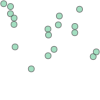

In [4]:
from functions import propose_stops
proposed_stops = propose_stops(filtered_blocks, stop_coverage, streets, zones, stops)

# Display the proposed stops
proposed_stops.union_all()